In [22]:
%load_ext autoreload
%autoreload 2 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from itertools import product
from src.utils import flatten_product
from src.bootstrap import bootstrap_downsample
from src.baselines import plot_related_baseline_roc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
cedar = pd.read_csv('../data/mutant/221028_cedar_related_newcore_fold.csv')
prime = pd.read_csv('../data/mutant/221119_prime_related_10fold.csv')

In [20]:
display(cedar.groupby('agg_label').agg(ratio=('Peptide', 'count'))/len(cedar))
display(cedar.groupby('agg_label').agg(count=('Peptide', 'count')))

,ratio
agg_label,
0,0.791955
1,0.208045


,count
agg_label,
0,2402
1,631


In [50]:
display(prime.groupby('agg_label').agg(ratio=('Peptide', 'count'))/len(prime))
display(prime.groupby('agg_label').agg(count=('Peptide', 'count')))

,ratio
agg_label,
0,0.958829
1,0.041171


,count
agg_label,
0,2981
1,128


# Downsample pos on CEDAR

In [57]:
128/(128+487)

0.208130081300813

In [54]:
n_cedar = int(0.0422*2402 / (1-0.0422))
n_prime = int((.792*128/0.208))
n_cedar, n_prime

(105, 487)

In [64]:
prime

,Peptide,HLA,EL_rank_mut,agg_label,fold,EL_rank_wt,HLA_full,MixMHCallele,MixMHCrank,PRIME_score,...,mutation_position,mutation_score,mutation_type,nnalign_score,ratio_rank,seq_id,trueHLA_EL_rank,wild_type,wt_EL_rank,wt_core
0,AAAAAAAAVL,HLA-B0702,0.9883,0,0,2.6958,HLA-B*07:02,C1202,0.554,0.063260,...,9,4,substitution,0.05931,0.492857,seq_1,3.6567,AAAAAAAAVI,13.1934,AAAAAAAAI
1,AAAAAAAVL,HLA-B0702,0.9883,0,0,3.9965,HLA-B*07:02,C0303,0.016,0.230378,...,8,4,substitution,0.07572,0.814084,seq_2,0.9883,AAAAAAAVI,3.9965,AAAAAAAVI
2,AAAALHMQR,HLA-A1101,0.3609,0,5,0.3717,HLA-A*11:01,A6801,0.022,0.193032,...,7,2,substitution,0.08034,0.190079,seq_3,0.3609,AAAALHMLR,0.3717,AAAALHMLR
3,AAAKAKNIPK,HLA-A0301,0.6000,0,0,0.3640,HLA-A*03:01,A1101,0.370,0.064915,...,6,0,substitution,0.04388,0.691710,seq_4,1.0865,AAAKAKFIPK,0.8995,AAAKAFIPK
4,AAAPAVGPPL,HLA-B0702,0.0897,0,2,1.1108,HLA-B*07:02,C0303,0.135,0.131558,...,3,4,substitution,0.07674,7.193756,seq_5,1.4894,AAATAVGPPL,3.0185,AAATAGPPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3104,YYCEVLPGEI,HLA-A2402,0.9916,0,8,1.2384,HLA-A*24:02,C1403,0.750,0.046758,...,2,2,substitution,0.15728,2.850173,seq_3105,0.9916,YYREVLPGEI,1.2384,YYREVLPEI
3105,YYCHWGYEV,HLA-A2402,0.4481,0,9,0.4865,HLA-A*24:02,C0702,0.042,0.212506,...,4,1,substitution,0.20161,1.700454,seq_3106,0.4481,YYCHGGYEV,0.4865,YYCHGGYEV
3106,YYEDIKNDF,HLA-A2402,0.0940,0,1,0.1546,HLA-A*24:02,C0401,0.021,0.232911,...,6,4,substitution,0.15744,5.368056,seq_3107,0.0940,YYEDIKKDF,0.1546,YYEDIKKDF
3107,YYNCAFTRNI,HLA-A2402,1.3054,0,9,0.7245,HLA-A*24:02,A2402,1.135,0.037968,...,3,2,substitution,0.27727,0.127607,seq_3108,1.3054,YYNRAFTRNI,0.7245,YYNRAFTRI


In [110]:
roc_auc_score(prime['agg_label'].values, -1*prime['EL_rank_mut'].values)

0.6633195131667224

Sampling


Bootstrapping rounds:   0%|          | 0/10000 [00:00<?, ?it/s]

Making results DF and curves
Sampling


Bootstrapping rounds:   0%|          | 0/10000 [00:00<?, ?it/s]

Making results DF and curves


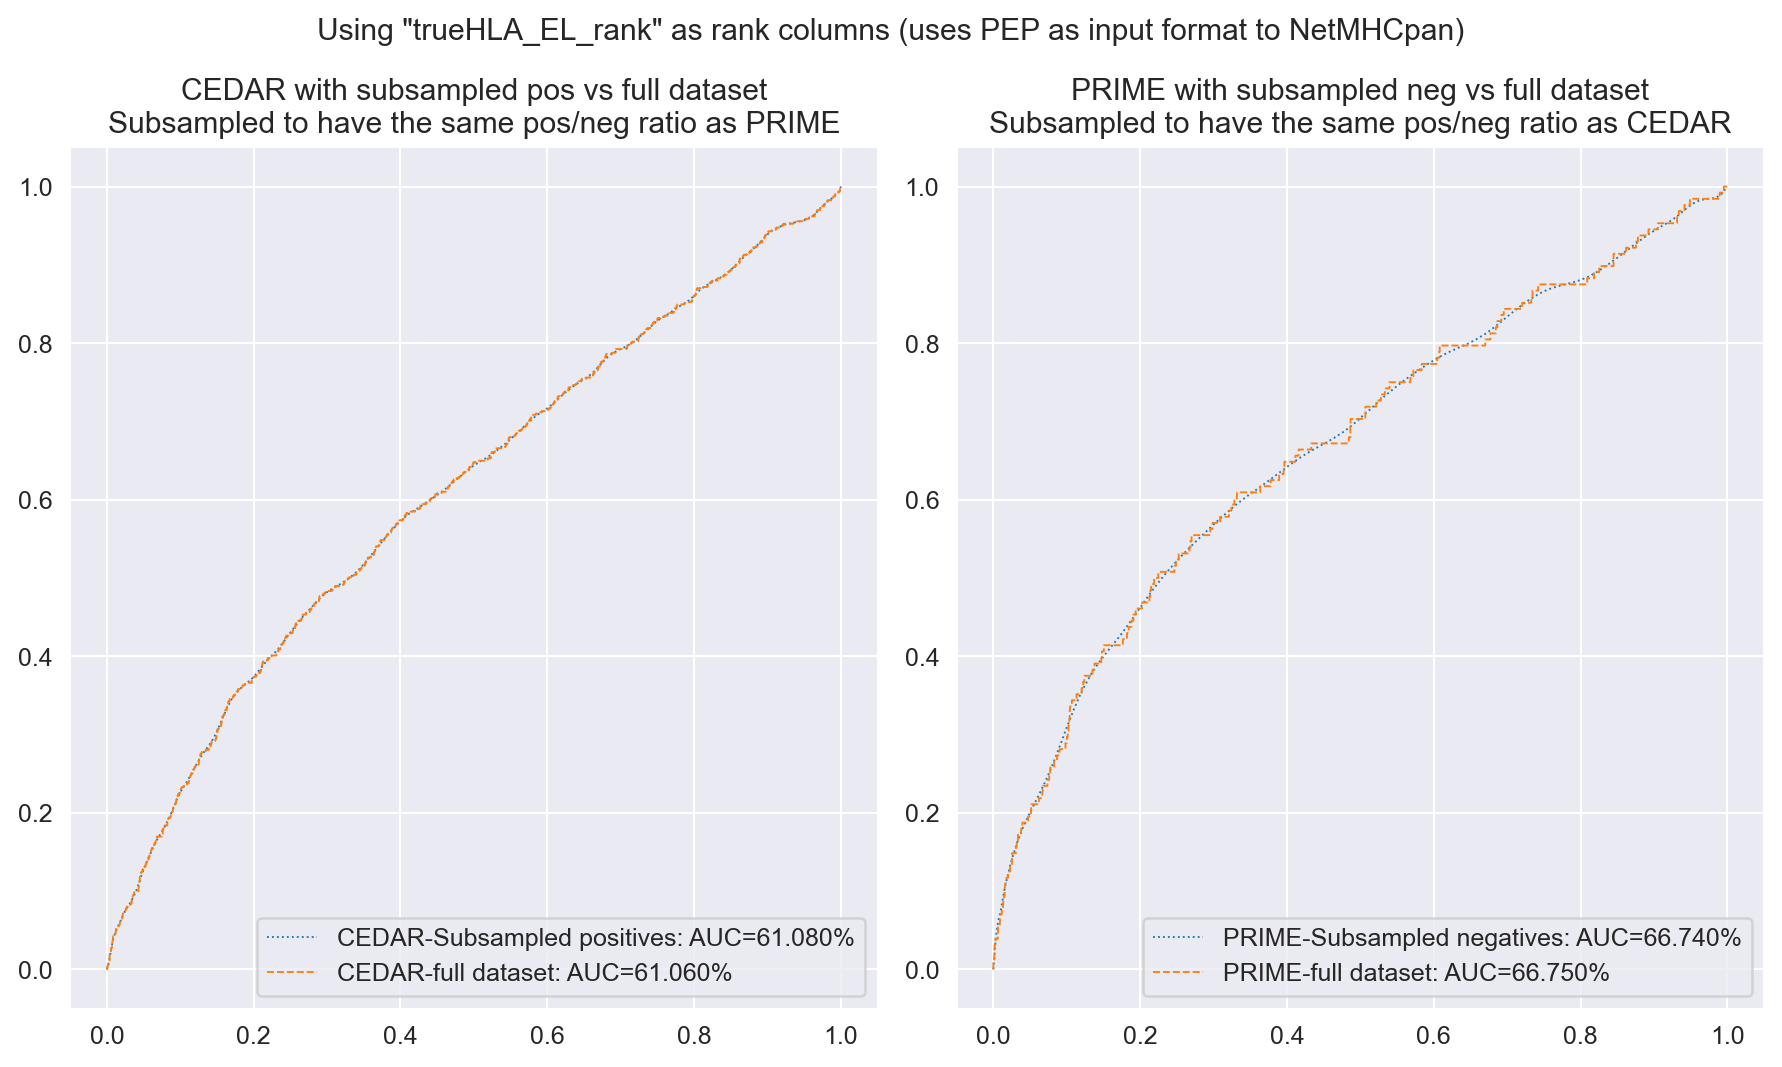

In [111]:
from sklearn.metrics import roc_curve, roc_auc_score
f,a = plt.subplots(1,2, figsize=(10,6))

result_df_cedar, mean_rocs_cedar = bootstrap_downsample(cedar, downsample_label=1, downsample_number=n_cedar, score_col='trueHLA_EL_rank', target_col='agg_label', n_rounds=10000, n_jobs = 8)
result_df_prime, mean_rocs_prime = bootstrap_downsample(prime, downsample_label=0, downsample_number=n_prime, score_col='trueHLA_EL_rank', target_col='agg_label', n_rounds=10000, n_jobs = 8)
# Cedar
a[0].plot(mean_rocs_cedar[0], mean_rocs_cedar[1], label=f'CEDAR-Subsampled positives: AUC={round(mean_rocs_cedar[-1], 4):.3%}', ls=':', lw=.75)
scores = -1*cedar['trueHLA_EL_rank'].values
labels = cedar['agg_label'].values
fpr, tpr, _ = roc_curve(labels, scores)
auc = roc_auc_score(labels, scores)
a[0].plot(fpr, tpr, label=f'CEDAR-full dataset: AUC={round(auc, 4):.3%}', ls='--', lw=.75)
a[0].set_title('CEDAR with subsampled pos vs full dataset\nSubsampled to have the same pos/neg ratio as PRIME')

# Prime
a[1].plot(mean_rocs_prime[0], mean_rocs_prime[1], label=f'PRIME-Subsampled negatives: AUC={round(mean_rocs_prime[-1], 4):.3%}', ls=':', lw=.75)
scores = -1*prime['trueHLA_EL_rank'].values
labels = prime['agg_label'].values
fpr, tpr, _ = roc_curve(labels, scores)
auc = roc_auc_score(labels, scores)
a[1].plot(fpr, tpr, label=f'PRIME-full dataset: AUC={round(auc, 4):.3%}', ls='--', lw=.75)


a[1].set_title('PRIME with subsampled neg vs full dataset\nSubsampled to have the same pos/neg ratio as CEDAR')
f.suptitle('Using "trueHLA_EL_rank" as rank columns (uses PEP as input format to NetMHCpan)')
f.tight_layout()
a[0].legend(loc='lower right')
a[1].legend(loc='lower right')

Sampling


Bootstrapping rounds:   0%|          | 0/10000 [00:00<?, ?it/s]

Making results DF and curves
Sampling


Bootstrapping rounds:   0%|          | 0/10000 [00:00<?, ?it/s]

Making results DF and curves


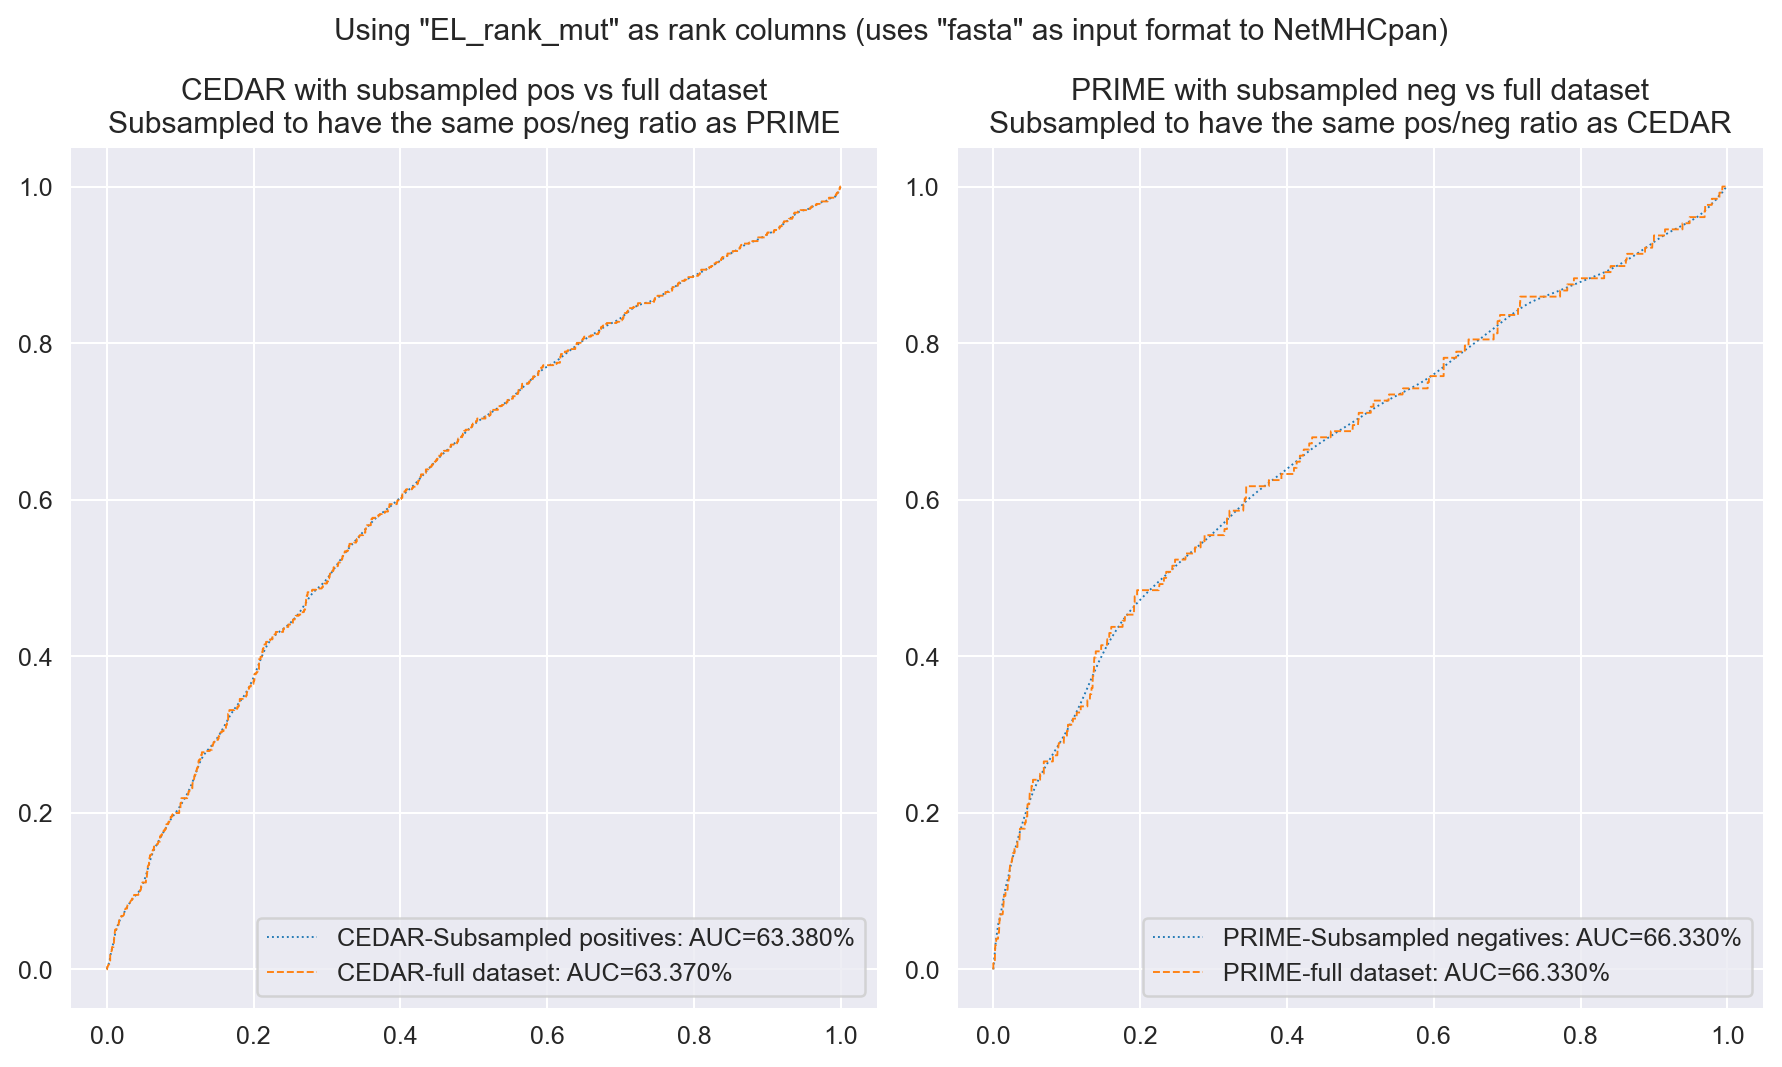

In [74]:
from sklearn.metrics import roc_curve, roc_auc_score
f,a = plt.subplots(1,2, figsize=(10,6))

result_df_cedar, mean_rocs_cedar = bootstrap_downsample(cedar, downsample_label=1, downsample_number=n_cedar, score_col='EL_rank_mut', target_col='agg_label', n_rounds=10000, n_jobs = 8)
result_df_prime, mean_rocs_prime = bootstrap_downsample(prime, downsample_label=0, downsample_number=n_prime, score_col='EL_rank_mut', target_col='agg_label', n_rounds=10000, n_jobs = 8)
# Cedar
a[0].plot(mean_rocs_cedar[0], mean_rocs_cedar[1], label=f'CEDAR-Subsampled positives: AUC={round(mean_rocs_cedar[-1], 4):.3%}', ls=':', lw=.75)
scores = -1*cedar['EL_rank_mut'].values
labels = cedar['agg_label'].values
fpr, tpr, _ = roc_curve(labels, scores)
auc = roc_auc_score(labels, scores)
a[0].plot(fpr, tpr, label=f'CEDAR-full dataset: AUC={round(auc, 4):.3%}', ls='--', lw=.75)
a[0].set_title('CEDAR with subsampled pos vs full dataset\nSubsampled to have the same pos/neg ratio as PRIME')

# Prime
a[1].plot(mean_rocs_prime[0], mean_rocs_prime[1], label=f'PRIME-Subsampled negatives: AUC={round(mean_rocs_prime[-1], 4):.3%}', ls=':', lw=.75)
scores = -1*prime['EL_rank_mut'].values
labels = prime['agg_label'].values
fpr, tpr, _ = roc_curve(labels, scores)
auc = roc_auc_score(labels, scores)
a[1].plot(fpr, tpr, label=f'PRIME-full dataset: AUC={round(auc, 4):.3%}', ls='--', lw=.75)


a[1].set_title('PRIME with subsampled neg vs full dataset\nSubsampled to have the same pos/neg ratio as CEDAR')
f.suptitle('Using "EL_rank_mut" as rank columns (uses "fasta" as input format to NetMHCpan)')
f.tight_layout()
a[0].legend(loc='lower right')
a[1].legend(loc='lower right')

# NNalign flip/random

## Redo NNalign motifs with random peps

In [86]:
random = pd.read_csv('../../randompeps/randompeps_9mer_1000000.pep', header=None)
random.columns = ['Peptide']
random['agg_label']=0

In [87]:
map_ = {0:'neg', 1:'pos'}
ratio = 0.1
for label in [0, 1]:
    for dataset, nm in zip([cedar, prime], ['cedar', 'prime']):
        subset = dataset.query('agg_label==@label')
        subset['agg_label'] = 1
        n = 9*len(subset)
        fn = f'{nm}_label_{map_[label]}_randomnegs.pep'
        df = pd.concat([subset, random.sample(n, random_state=13)])
        df[['Peptide', 'agg_label']].to_csv(f'../../nnalign_cedar/flip_labels/data_flip/{fn}', sep='\t', header=False, index=False)

## Redo NNalign motifs with flipped labels

In [90]:
cedar

,Peptide,HLA,EL_rank_mut,agg_label,fold,EL_rank_wt,PMIDs,Peptide_mut,Peptide_wt,Pos_mut,...,wt_core,wt_true,aliphatic_index,boman,hydrophobicity,isoelectric_point,VHSE1,VHSE3,VHSE7,VHSE8
0,AAAAAAQQIQV,HLA-B0702,3.9712,0,6,1.0441,27198675,AAAAAAQQI,AAAAAAQQL,0,...,AAAAAQLQV,True,116.363636,-0.290909,0.818182,6.100000,0.004545,-0.675455,0.105455,-0.388182
1,AAAAQQIQV,HLA-B0702,4.9092,0,6,4.7746,27198675,AAAAQQIQV,AAAAQQLQV,0,...,AAAAQQLQV,True,120.000000,0.046667,0.600000,6.100000,-0.027778,-0.525556,0.048889,-0.367778
2,AAAAQQIQV,HLA-A0201,1.9555,0,6,2.2847,27198675,AAAAQQIQV,AAAAQQLQV,0,...,AAAAQQLQV,True,120.000000,0.046667,0.600000,6.100000,-0.027778,-0.525556,0.048889,-0.367778
3,AAHFTVLLY,HLA-A1101,0.4196,0,9,0.5881,31511069,AAHFTVLLY,AAHFTALLY,0,...,AAHFTALLY,True,141.111111,-1.456667,1.444444,7.542349,0.571111,-0.022222,-0.167778,-0.212222
4,AAIAASRSV,HLA-C1203,0.0591,0,6,1.1729,30556813,AAIAASRSV,AAIAASRSA,0,...,AAIAASRSA,True,120.000000,0.613333,1.088889,10.550002,-0.020000,-0.685556,0.117778,-0.114444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3028,YYNFEGDIALL,HLA-A2402,0.6247,0,9,0.7584,"34270940,34270940",YYNFEGDIALL,SYNFEGDIALL,0,...,SYNGDIALL,True,115.454545,0.178182,0.290909,3.550073,0.305455,-0.030909,0.071818,-0.422727
3029,YYPGKKEPF,HLA-A2402,0.0965,0,1,0.0817,"34270940,34270940",YYPGKKEPF,YYSGKKEPF,0,...,YYSGKKEPF,True,0.000000,1.585556,-1.633333,9.121620,-0.060000,0.130000,0.283333,0.535556
3030,YYSKNLNSF,HLA-A2402,0.0033,1,3,4.6860,28423700,YYSKNLNSF,YYSKNLNSS,0,...,YYSKNLNSS,True,43.333333,2.001111,-0.944444,9.145600,-0.043333,0.164444,-0.151111,-0.345556
3031,YYSKNLNSFF,HLA-A2402,0.0033,1,3,0.0350,"28423700,28423700",YYSKNLNSF,YYSKNLNSSF,0,...,YYSKNLNSF,True,39.000000,1.503000,-0.570000,9.145600,0.113000,0.244000,-0.269000,-0.331000


In [91]:
prime

,Peptide,HLA,EL_rank_mut,agg_label,fold,EL_rank_wt,HLA_full,MixMHCallele,MixMHCrank,PRIME_score,...,mutation_position,mutation_score,mutation_type,nnalign_score,ratio_rank,seq_id,trueHLA_EL_rank,wild_type,wt_EL_rank,wt_core
0,AAAAAAAAVL,HLA-B0702,0.9883,0,0,2.6958,HLA-B*07:02,C1202,0.554,0.063260,...,9,4,substitution,0.05931,0.492857,seq_1,3.6567,AAAAAAAAVI,13.1934,AAAAAAAAI
1,AAAAAAAVL,HLA-B0702,0.9883,0,0,3.9965,HLA-B*07:02,C0303,0.016,0.230378,...,8,4,substitution,0.07572,0.814084,seq_2,0.9883,AAAAAAAVI,3.9965,AAAAAAAVI
2,AAAALHMQR,HLA-A1101,0.3609,0,5,0.3717,HLA-A*11:01,A6801,0.022,0.193032,...,7,2,substitution,0.08034,0.190079,seq_3,0.3609,AAAALHMLR,0.3717,AAAALHMLR
3,AAAKAKNIPK,HLA-A0301,0.6000,0,0,0.3640,HLA-A*03:01,A1101,0.370,0.064915,...,6,0,substitution,0.04388,0.691710,seq_4,1.0865,AAAKAKFIPK,0.8995,AAAKAFIPK
4,AAAPAVGPPL,HLA-B0702,0.0897,0,2,1.1108,HLA-B*07:02,C0303,0.135,0.131558,...,3,4,substitution,0.07674,7.193756,seq_5,1.4894,AAATAVGPPL,3.0185,AAATAGPPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3104,YYCEVLPGEI,HLA-A2402,0.9916,0,8,1.2384,HLA-A*24:02,C1403,0.750,0.046758,...,2,2,substitution,0.15728,2.850173,seq_3105,0.9916,YYREVLPGEI,1.2384,YYREVLPEI
3105,YYCHWGYEV,HLA-A2402,0.4481,0,9,0.4865,HLA-A*24:02,C0702,0.042,0.212506,...,4,1,substitution,0.20161,1.700454,seq_3106,0.4481,YYCHGGYEV,0.4865,YYCHGGYEV
3106,YYEDIKNDF,HLA-A2402,0.0940,0,1,0.1546,HLA-A*24:02,C0401,0.021,0.232911,...,6,4,substitution,0.15744,5.368056,seq_3107,0.0940,YYEDIKKDF,0.1546,YYEDIKKDF
3107,YYNCAFTRNI,HLA-A2402,1.3054,0,9,0.7245,HLA-A*24:02,A2402,1.135,0.037968,...,3,2,substitution,0.27727,0.127607,seq_3108,1.3054,YYNRAFTRNI,0.7245,YYNRAFTRI


In [106]:
prime.query('Peptide=="HSCVMASLR"')

,Peptide,HLA,EL_rank_mut,agg_label,fold,EL_rank_wt,HLA_full,MixMHCallele,MixMHCrank,PRIME_score,...,mutation_position,mutation_score,mutation_type,nnalign_score,ratio_rank,seq_id,trueHLA_EL_rank,wild_type,wt_EL_rank,wt_core
936,HSCVMASLR,HLA-A6801,0.8403,1,9,2.4522,HLA-A*68:01,A6801,0.055,0.140147,...,1,4,substitution,0.03464,21.894643,seq_937,0.8403,HPCVMASLR,2.4522,HPCVMASLR


In [104]:
from copy import deepcopy
for dataset, nm in zip([cedar, prime], ['cedar', 'prime']):
    xd = deepcopy(dataset)
    xd['agg_label'] = xd['agg_label'].apply(lambda x: abs(x-1))
    xd[['Peptide', 'agg_label']].to_csv(f'../../nnalign_cedar/flip_labels/data_flip/{nm}_flipped_labels.pep', sep='\t', header=False, index=False)

## load results